In [1]:
!pip install shap lime matplotlib seaborn scikit-learn pandas numpy joblib


In [2]:
# Load preprocessed datasets
import pandas as pd
fraud_data = pd.read_csv('/content/Preprocessed_Fraud_Data.csv')
creditcard_data = pd.read_csv('/content/Preprocessed_Creditcard_Data.csv')

# Load models
import joblib
fraud_model = joblib.load("/content/fraud_random_forest_model.pkl")
creditcard_model = joblib.load("/content/random_forest_model.pkl")

# Feature & Target separation
fraud_features = fraud_data.drop(columns=['class'])
fraud_target = fraud_data['class']

creditcard_features = creditcard_data.drop(columns=['Class'])
creditcard_target = creditcard_data['Class']

SHAP Summary Plot for Credit Card Model

100%|===================| 567410/567452 [76:36<00:00]       

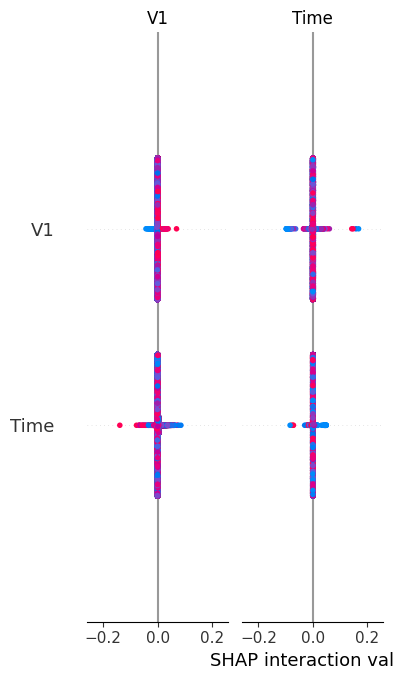

In [4]:
import shap

# Create the explainer with the model and data
explainer = shap.TreeExplainer(creditcard_model, creditcard_features)

# Calculate SHAP values, disabling additivity check during the calculation
shap_values = explainer.shap_values(creditcard_features, check_additivity=False)

# Create the summary plot
shap.summary_plot(shap_values, creditcard_features)

SHAP Summary Plot for Fraud Model

In [ ]:
import pandas as pd
fraud_features_encoded = pd.get_dummies(fraud_features, columns=fraud_features.select_dtypes(include=['object']).columns)

# Create the explainer with the encoded features
explainer_fraud = shap.Explainer(fraud_model, fraud_features_encoded)
shap_values_fraud = explainer_fraud(fraud_features_encoded)

# Summary plot (use encoded features)
shap.summary_plot(shap_values_fraud, fraud_features_encoded)

SHAP Force Plot (for a single prediction)

In [ ]:
import shap
explainer = shap.TreeExplainer(creditcard_model, creditcard_features)  # Define 'explainer' here

# Calculate SHAP values
shap_values = explainer.shap_values(creditcard_features, check_additivity=False)

shap.initjs()
i = 10
shap.force_plot(explainer.expected_value[0], shap_values[i], creditcard_features.iloc[i])

 87%|=================   | 491369/567452 [64:25<09:58]       

LIME Explanation
LIME for Credit Card Model

In [1]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(creditcard_features),
    feature_names=creditcard_features.columns,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Explain a single instance
i = 10  # Choose a sample index
exp = explainer.explain_instance(creditcard_features.iloc[i].values,
                                 creditcard_model.predict_proba)

# Show explanation
exp.show_in_notebook()


NameError: name 'lime' is not defined

LIME for Fraud Model

In [ ]:
explainer_fraud = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(fraud_features),
    feature_names=fraud_features.columns,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)

# Explain a single instance
exp_fraud = explainer_fraud.explain_instance(fraud_features.iloc[i].values,
                                             fraud_model.predict_proba)

# Show explanation
exp_fraud.show_in_notebook()
